# O que vende um carro?

VOu tentar determinar quais fatores influenciaram o preço de um veículo.

## Importação de bibliotecas

In [1]:
# Carregando todas as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Carregue dados

In [2]:
# Carregue o arquivo com os dados em um DataFrame
data_set = pd.read_csv('/datasets/vehicles_us.csv')


### Explore os dados iniciais

O conjunto de dados contém os seguintes campos:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gasolina, diesel etc.
- `odometer` — a quilometragem do veículo quando a propaganda foi publicada 
- `transmission`
- `paint_color`
- `is_4wd` — Se o veículo é 4 por 4 (tipo Booleano)
- `date_posted` — a data que a propaganda foi publicada
- `days_listed` — dias desde a publicação até a retirada

[Entendendo os campos, explore-os para se familiarizar com os dados.]

In [3]:
# imprima as informações gerais/resumidas sobre o DataFrame
data_set.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [4]:
# imprima uma amostragem dos dados

data_set.head(5)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


Temos algumas colunas com informações nulas como : model_year , cylinders, odometer, paint_color, is_4wd. além disso a coluna model_year apresenta dados float, deveria ser substituido por tipo int.

Na coluna is_4wd, temos os valores 1 e 0 , tvlz seja melhor trocar por true e false 

Em algumas, model_year , cylinders, odometer, paint_color, is_4wd possuem valores ausentes. is_4wd é o que apresenta o maior número de dados nulos. 

### Conclusões e próximos passos

Existem muitos dados faltates, me chama a atenção principalmente a coluna is_4wd, além disso a coluna date_posted esta com
valores object ao inves de data. A coluna modelo_year precisa modificar o tipo dos dados. 

## Verificando os valores ausentes

In [5]:
data_set.isnull().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [6]:
porcentagem_ausentes_modelo = len(data_set[data_set['model_year'].isnull()])/len(data_set['model_year'])
print(f'{porcentagem_ausentes_modelo*100}%')

7.023774866569626%


In [7]:
porcentagem_ausentes_cylinders = len(data_set[data_set['cylinders'].isnull()])/len(data_set['cylinders'])
print(f'{porcentagem_ausentes_cylinders*100}%')


10.208636584182436%


In [8]:
porcentagem_ausentes_odometer = len(data_set[data_set['odometer'].isnull()])/len(data_set['odometer'])
print(f'{porcentagem_ausentes_odometer*100}%')


15.316836487142163%


In [9]:
porcentagem_ausentes_paint_color = len(data_set[data_set['paint_color'].isnull()])/len(data_set['paint_color'])
print(f'{porcentagem_ausentes_paint_color*100}%')


17.985443959243085%


In [10]:
porcentagem_ausentes_is_4wd = len(data_set[data_set['is_4wd'].isnull()])/len(data_set['is_4wd'])
print(f'{porcentagem_ausentes_is_4wd*100}%')


50.36972343522562%


In [11]:
data_set['is_4wd'].unique()

array([ 1., nan])

Vou substituir todos os NaN por 0 assumindo que são os valores faltantes 


In [12]:
data_set['is_4wd'] = data_set['is_4wd'].fillna(0)

In [13]:
data_set['is_4wd'].unique()

array([1., 0.])

--------*Preenchendo a coluna Cylinders*-------

In [14]:
sem_ausentes = data_set.pivot_table(index='model', values = 'cylinders', aggfunc='median').dropna()
sem_ausentes

,cylinders
model,
acura tl,6.0
bmw x5,6.0
buick enclave,6.0
cadillac escalade,8.0
chevrolet camaro,6.0
...,...
toyota sienna,6.0
toyota tacoma,6.0
toyota tundra,8.0


In [15]:
def fill_cylinders(row):
# passando pela verificação de que é um valor nulo
    if pd.isna(row['cylinders']):
        return sem_ausentes['cylinders'][row['model']]
    return row['cylinders']

In [16]:
data_set['cylinders'] = data_set.apply(fill_cylinders, axis=1) 

In [17]:
data_set['cylinders'].isnull().sum()

0

---------*Model Year*-------------

In [18]:
sem_ausentes_modelYear = data_set.pivot_table(index='model', values = 'model_year', aggfunc='median').dropna()
sem_ausentes_modelYear

,model_year
model,
acura tl,2007.0
bmw x5,2010.0
buick enclave,2012.0
cadillac escalade,2009.0
chevrolet camaro,2013.0
...,...
toyota sienna,2008.0
toyota tacoma,2010.0
toyota tundra,2009.0


In [19]:
def fill_model_year(row):
# passando pela verificação de que é um valor nulo
    if pd.isna(row['model_year']):
        return sem_ausentes_modelYear['model_year'][row['model']]
    return row['model_year']

In [20]:
data_set['model_year'] = data_set.apply(fill_model_year, axis=1) 

In [21]:
data_set['model_year'].isnull().sum()

0

-----------*Paint_color*---------

In [22]:
data_set['paint_color'].isnull().sum()

9267

Mudar o branco para o Não informado

In [25]:
data_set['paint_color'] = data_set.apply(fill_color, axis=1) 

In [26]:
data_set['paint_color'].isnull().sum()

0

-----------*Odometer*---------

In [27]:
sem_ausentes_odometer = data_set.pivot_table(index='condition', values = 'odometer', aggfunc='median').dropna()
sem_ausentes_odometer

,odometer
condition,
excellent,104230.0
fair,181613.0
good,129000.0
like new,72982.5
new,8002.0
salvage,142673.5


In [28]:
def fill_odometer(row):
# passando pela verificação de que é um valor nulo
    if pd.isna(row['odometer']):
        return sem_ausentes_odometer['odometer'][row['condition']]
    return row['odometer']

In [29]:
data_set['odometer'] = data_set.apply(fill_odometer, axis=1) 

In [30]:
data_set['odometer'].isnull().sum()

0

## Corrigindo os tipos de dados

In [31]:
data_set['date_posted'] = pd.to_datetime(data_set['date_posted'], format='%Y-%m-%d')


In [32]:
data_set['model_year'] = data_set['model_year'].astype(int)
data_set['cylinders'] = data_set['cylinders'].astype(int)

In [33]:
data_set['odometer'] = data_set['odometer'].astype(int)

## Enriquecendo os dados

In [34]:
# Adicione valores data para quando a propaganda estiver colocada
data_set['year_of_ad'] = data_set['date_posted'].dt.year
data_set['moth_of_ad'] = data_set['date_posted'].dt.month
data_set['day_of_ad'] = data_set['date_posted'].dt.day

In [35]:
# Adicione a idade do veículo quando a propaganda for colocada
data_set['idade_veiculo'] = data_set['year_of_ad'] - data_set['model_year'] 

In [36]:
# Adicione a quilometragem média por ano
def km_ano(x):
    if x['year_of_ad'] - x['model_year'] != 0:
        return  x['odometer']/(x['year_of_ad'] - x['model_year'])
    return x['odometer']

data_set['km_ano'] = data_set.apply(km_ano, axis=1) 

In [37]:
# Isso deve ajudar a substituir os valores condicionais por alguma coisa que pode ser manipulada mais facilmente
data_set['condition'].replace({'new' : 5,
'like new' : 4,
'excellent' : 3,
'good' : 2,
'salvage' : 1,
'fair' : 0}, inplace = True)


## Verificando os dados limpos

In [38]:
# imprima as informações gerais/resumidas sobre o DataFrame

data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   price          51525 non-null  int64         
 1   model_year     51525 non-null  int64         
 2   model          51525 non-null  object        
 3   condition      51525 non-null  int64         
 4   cylinders      51525 non-null  int64         
 5   fuel           51525 non-null  object        
 6   odometer       51525 non-null  int64         
 7   transmission   51525 non-null  object        
 8   type           51525 non-null  object        
 9   paint_color    51525 non-null  object        
 10  is_4wd         51525 non-null  float64       
 11  date_posted    51525 non-null  datetime64[ns]
 12  days_listed    51525 non-null  int64         
 13  year_of_ad     51525 non-null  int64         
 14  moth_of_ad     51525 non-null  int64         
 15  day_of_ad      5152

In [39]:
# imprima uma amostragem dos dados

data_set.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_of_ad,moth_of_ad,day_of_ad,idade_veiculo,km_ano
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,Não informado,1.0,2018-06-23,19,2018,6,23,7,20714.285714
1,25500,2011,ford f-150,2,6,gas,88705,automatic,pickup,white,1.0,2018-10-19,50,2018,10,19,7,12672.142857
2,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,0.0,2019-02-07,79,2019,2,7,6,18333.333333
3,1500,2003,ford f-150,0,8,gas,181613,automatic,pickup,Não informado,0.0,2019-03-22,9,2019,3,22,16,11350.812500
4,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,0.0,2019-04-02,28,2019,4,2,2,40451.500000


## Estudando os parâmetros fundamentais

Os parâmetros são
- Preço
- A idade do veículo quando a propaganda foi colocada
- Quilometragem
- Número de cilindros
- Condição

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

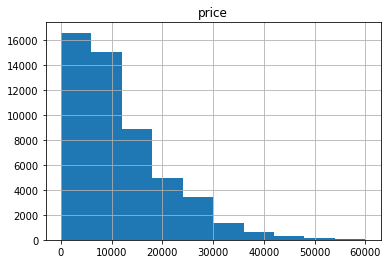

In [40]:
#Preço
data_set.hist('price',bins=10, range = (0,60000)) 

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

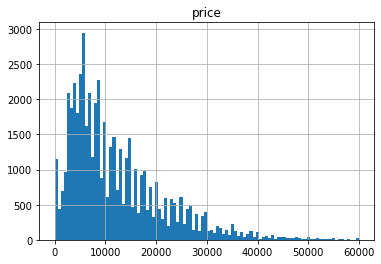

In [41]:
#Preço
data_set.hist('price',bins=100, range = (0,60000)) 

Podemos ver que o parametro preço apresenta um alongamento para a direita, graças aos carros com valores muito elevados e varios valores proximos ou iguais a zero, o que não faz muito sentido mesmo para um carro mais velho ter um valor tão baixo

array([[<AxesSubplot:title={'center':'idade_veiculo'}>]], dtype=object)

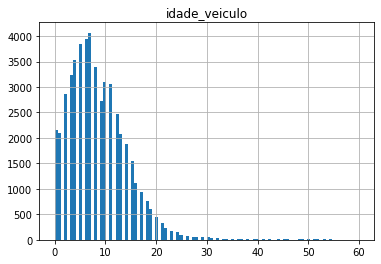

In [42]:
#Idade
data_set.hist('idade_veiculo',bins=100, range = (0,60)) 

Podemos ver uma pequena quantiade de carros bem mais velhos que a grande maioria, provavelmente esses carros estão alterando a média de idades dos veiculos. Existem alguns carros com 0 anos, mas como temos carros novos no dataset podemos assumir que são esses os carros. 

array([[<AxesSubplot:title={'center':'odometer'}>]], dtype=object)

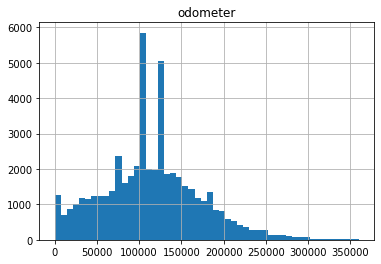

In [43]:
#quilometragem
data_set.hist('odometer',bins=50, range = (0,360000)) 


Vemos que um número muito grande de carros chega aos 100000 km, além disso alguns poucos carros chegam a mais de 250000 km. Alguns carros estão com kilometragem zerada, porém pode ser por serem carros novos.

array([[<AxesSubplot:title={'center':'cylinders'}>]], dtype=object)

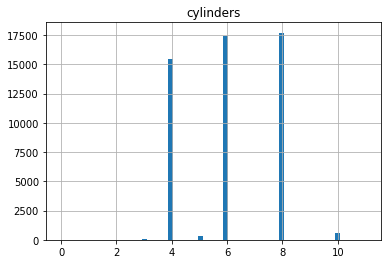

In [44]:
#Número de cilindros
data_set.hist('cylinders',bins=60, range = (0,11)) 

Em sua grande maioria os carros possuem de 4 a 8 cilindros, com menos unidades temos praticamente nenhum, com mais de 8 temos poucos carros. 
Alem disso vemos uma aparição de 5 cilindros, que não faz muito sentido, provavelmente sendo um erro

array([[<AxesSubplot:title={'center':'condition'}>]], dtype=object)

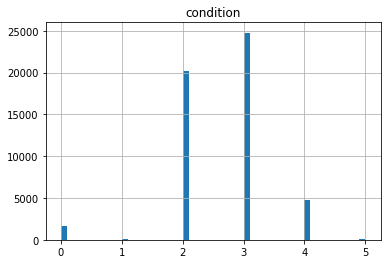

In [45]:
#Condição
data_set.hist('condition',bins=50, range = (0,5)) 

Aqui percebo algo estranho, o número de carros classificados como 'novos' é de aproximadamente 1600, proximo ao número de km = 0 no grafico correspondente, porém o grafico com a idade apresenta bem mais carros com idade 0 do que condição nova e km 0. 

## Observando os valores atípicos

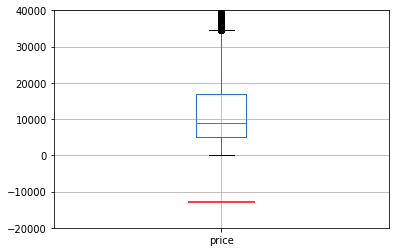

In [46]:
# Determine o limite inferior para valores atípicos
#preço
data_set.boxplot(column=['price'] )
plt.ylim(-20000, 40000)
Q1 = data_set['price'].quantile(0.25)
Q3 = data_set['price'].quantile(0.75)
IQR = Q3 - Q1
lim_inf_preco =Q1-1.5*IQR
plt.hlines(y=lim_inf_preco,xmin=0.9,xmax=1.1,color ='red')


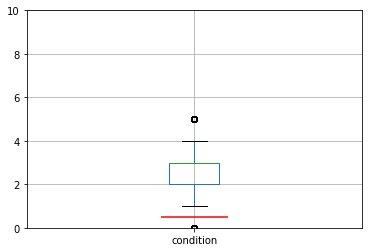

In [47]:
# Determinando o limites para condição
data_set.boxplot(column=['condition'] )
plt.ylim(0, 10)
Q1 = data_set['condition'].quantile(0.25)
Q3 = data_set['condition'].quantile(0.75)
IQR = Q3 - Q1
lim_inf_condition =Q1-1.5*IQR
plt.hlines(y=lim_inf_condition,xmin=0.9,xmax=1.1,color ='red')

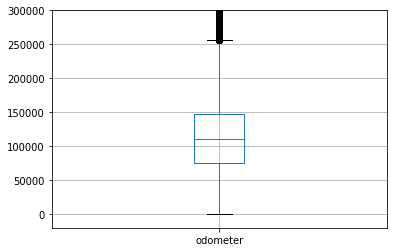

In [48]:
#limi inferior Odometer
data_set.boxplot(column=['odometer'] )
plt.ylim(-20000, 300000)
Q1 = data_set['odometer'].quantile(0.25)
Q3 = data_set['odometer'].quantile(0.75)
IQR = Q3 - Q1
lim_inf_odometer = Q1-1.5*IQR
plt.hlines(y=lim_inf_odometer,xmin=0.9,xmax=1.1,color ='red')

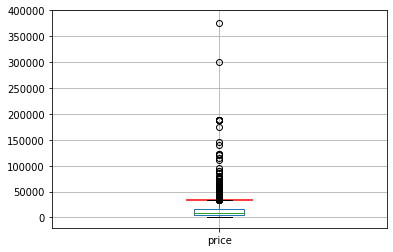

In [49]:
# Determine o limite superior para valores atípicos
#preço
data_set.boxplot(column=['price'] )
plt.ylim(-20000, 400000)
Q1 = data_set['price'].quantile(0.25)
Q3 = data_set['price'].quantile(0.75)
IQR = Q3 - Q1
#Criando a variavel para o limite superior
lim_sup_preco = Q3+1.5*IQR
plt.hlines(y=lim_sup_preco,xmin=0.9,xmax=1.1,color ='red')

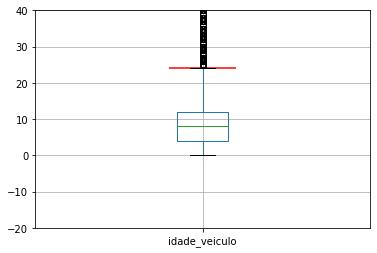

In [50]:
# idade_veiculo
data_set.boxplot(column=['idade_veiculo'] )
plt.ylim(-20, 40)
Q1 = data_set['idade_veiculo'].quantile(0.25)
Q3 = data_set['idade_veiculo'].quantile(0.75)
IQR = Q3 - Q1
lim_sup_idade_veiculo = Q3+1.5*IQR
plt.hlines(y=lim_sup_idade_veiculo,xmin=0.9,xmax=1.1,color ='red')

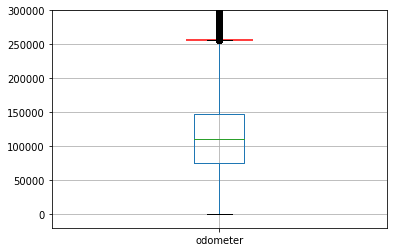

In [51]:
#odometer
data_set.boxplot(column=['odometer'] )
plt.ylim(-20000, 300000)
Q1 = data_set['odometer'].quantile(0.25)
Q3 = data_set['odometer'].quantile(0.75)
IQR = Q3 - Q1
lim_sup_odometer = Q3+1.5*IQR
plt.hlines(y=lim_sup_odometer,xmin=0.9,xmax=1.1,color ='red')

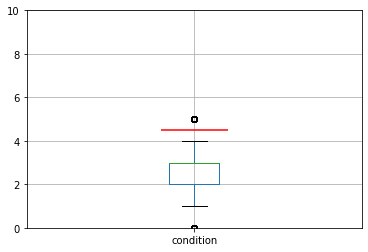

In [52]:
data_set.boxplot(column=['condition'] )
plt.ylim(0, 10)
Q1 = data_set['condition'].quantile(0.25)
Q3 = data_set['condition'].quantile(0.75)
IQR = Q3 - Q1
lim_sup_condition = Q3+1.5*IQR
plt.hlines(y=lim_sup_condition,xmin=0.9,xmax=1.1,color ='red')

In [53]:
# Armazene os dados sem os valores atípicos em um DataFrame separado
df = data_set[(data_set['price'] < lim_sup_preco) & (data_set['price'] > lim_inf_preco) &\
              (data_set['condition'] < lim_sup_preco)& (data_set['condition'] > lim_inf_condition)&\
              (data_set['odometer'] < lim_sup_odometer)&(data_set['odometer'] > lim_inf_odometer)&\
              (data_set['idade_veiculo'] < lim_sup_idade_veiculo) ]

In [54]:
df.max()

price                          34595
model_year                      2019
model              volkswagen passat
condition                          5
cylinders                         12
fuel                           other
odometer                      256000
transmission                   other
type                           wagon
paint_color                   yellow
is_4wd                           1.0
date_posted      2019-04-19 00:00:00
days_listed                      271
year_of_ad                      2019
moth_of_ad                        12
day_of_ad                         31
idade_veiculo                     23
km_ano                      195700.0
dtype: object

## Estudando os parâmetros fundamentais sem valores atípicos

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

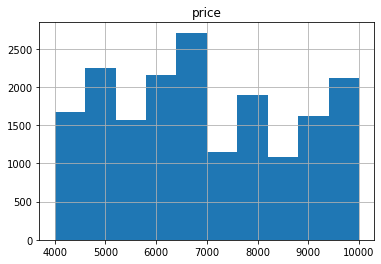

In [55]:
#Preço
df.hist('price',bins=10, range = (4000,10000))

array([[<AxesSubplot:title={'center':'idade_veiculo'}>]], dtype=object)

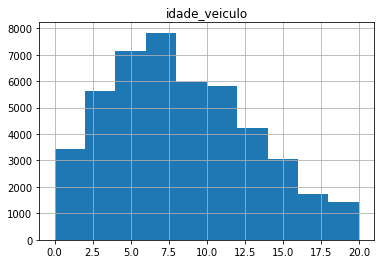

In [56]:
#Idade
df.hist('idade_veiculo',bins=10, range = (0,20)) 

array([[<AxesSubplot:title={'center':'odometer'}>]], dtype=object)

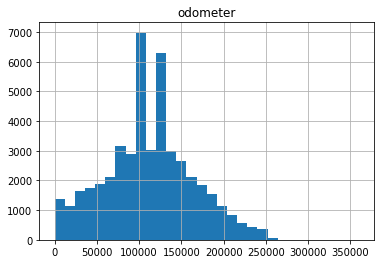

In [57]:
#quilometragem
df.hist('odometer',bins=30, range = (0,360000)) 

array([[<AxesSubplot:title={'center':'cylinders'}>]], dtype=object)

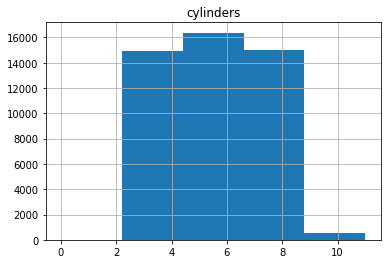

In [58]:
#Número de cilindros
df.hist('cylinders',bins=5, range = (0,11)) 

array([[<AxesSubplot:title={'center':'condition'}>]], dtype=object)

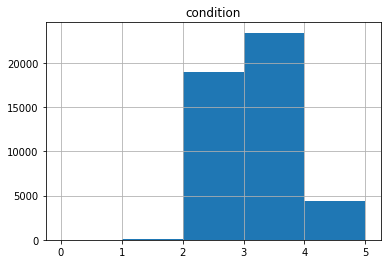

In [59]:
#Condição
df.hist('condition',bins=5, range = (0,5))

## Tempo de vida das propagandas

In [60]:
df['days_listed'].agg({'mean','median'})

mean      39.574905
median    33.000000
Name: days_listed, dtype: float64

array([[<AxesSubplot:title={'center':'days_listed'}>]], dtype=object)

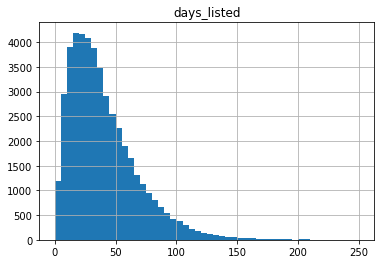

In [61]:
df.hist('days_listed',bins=50, range = (0,250))

Vemos que os carros tem maior chance de serem vendidos nos primeiros 50 dias, caso não seja vendido nesse tempo, a chance de venda começa a diminuir drasticamente

## Média de preços por cada tipo de veículo

In [62]:
df.pivot_table(index='model', values = 'price', aggfunc='mean').tail()

,price
model,
toyota sienna,8795.259615
toyota tacoma,15669.409449
toyota tundra,13979.528131
volkswagen jetta,6680.079430
volkswagen passat,8751.107143


In [63]:
df.pivot_table(index='model', values = 'days_listed', aggfunc='count')

,days_listed
model,
acura tl,226
bmw x5,261
buick enclave,269
cadillac escalade,276
chevrolet camaro,354
...,...
toyota sienna,312
toyota tacoma,762
toyota tundra,551


<AxesSubplot:xlabel='model', ylabel='days_listed'>

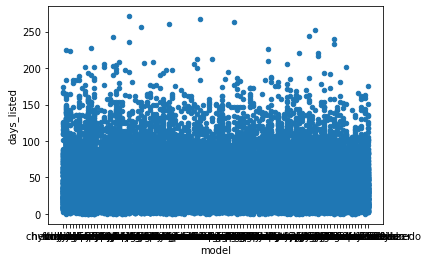

In [64]:
df.plot(x='model', y='days_listed', kind='scatter') 

## Fatores de preço

In [65]:
df_2 = df.select_dtypes(exclude='object')
df_2.corr().style.background_gradient(cmap='Blues')

,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,year_of_ad,moth_of_ad,day_of_ad,idade_veiculo,km_ano
price,1.000000,0.497755,0.127479,0.325142,-0.392223,0.340579,-0.002555,0.005648,-0.007157,-0.001383,-0.495757,0.248194
model_year,0.497755,1.000000,0.210583,-0.148362,-0.519394,-0.015861,-0.004164,0.016077,-0.016581,0.002831,-0.995540,0.521599
condition,0.127479,0.210583,1.000000,-0.077390,-0.261514,0.000584,-0.002728,0.002234,0.000105,-0.013557,-0.209753,0.027575
cylinders,0.325142,-0.148362,-0.077390,1.000000,0.110214,0.411168,0.003432,-0.000505,0.000587,-0.004510,0.147878,-0.049477
odometer,-0.392223,-0.519394,-0.261514,0.110214,1.000000,0.057453,0.006985,-0.009204,0.012696,-0.003887,0.516997,0.080861
is_4wd,0.340579,-0.015861,0.000584,0.411168,0.057453,1.000000,0.003279,-0.001949,0.002531,-0.002613,0.015630,0.023186
days_listed,-0.002555,-0.004164,-0.002728,0.003432,0.006985,0.003279,1.000000,0.012333,-0.012181,-0.001350,0.005315,-0.002153
year_of_ad,0.005648,0.016077,0.002234,-0.000505,-0.009204,-0.001949,0.012333,1.000000,-0.817839,-0.062262,0.078319,-0.112325
moth_of_ad,-0.007157,-0.016581,0.000105,0.000587,0.012696,0.002531,-0.012181,-0.817839,1.000000,0.033466,-0.060629,0.094717
day_of_ad,-0.001383,0.002831,-0.013557,-0.004510,-0.003887,-0.002613,-0.001350,-0.062262,0.033466,1.000000,-0.008697,0.010519


<AxesSubplot:xlabel='price', ylabel='idade_veiculo'>

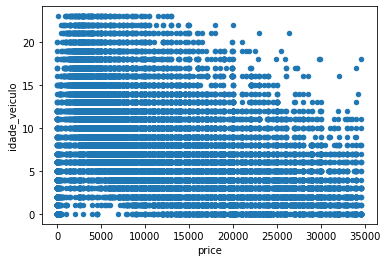

In [66]:
#preço por idade do veiculo
df.plot(x='price', y='idade_veiculo', kind='scatter')

<AxesSubplot:xlabel='price', ylabel='odometer'>

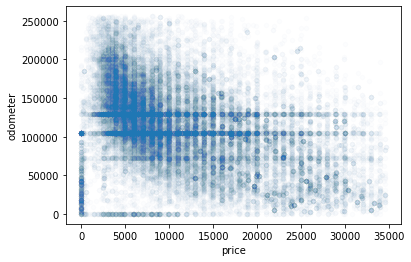

In [67]:
#preço por kilometragem
df.plot(x='price', y='odometer', kind='scatter',alpha=0.01)

<AxesSubplot:xlabel='condition', ylabel='price'>

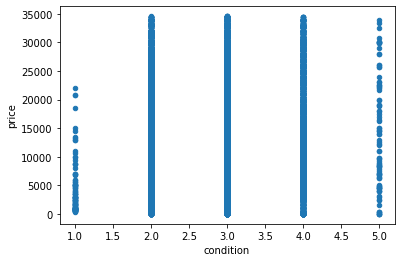

In [68]:
df.plot(x='condition', y='price', kind='scatter')

(-1.0, 2.0)

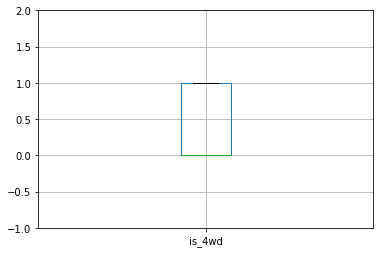

In [69]:
df.boxplot(column=['is_4wd'] )
plt.ylim(-1, 2)

## Conclusão geral



Tive que preencher alguns dados faltantes e limitar os outliers para que não modificasse analises futuras. 
Podemos notar que carros mais novos tendem a custar mais, sendo depois de 10 anos o preço do carro decai muito. 
Além disso podemos ver que as pessoas compram carros de até 200000km rodados, desde que paguem menos de 10000 por eles. 
A kilometragem parece ser um fator mais relevante que o estado do carro, mesmo que sejam dados relacionados, provavelmente a aparencia fisica do carro conta menos que o número de km rodados. 
O modelo do carro está diretamente relacionado com o preço dele. 
Carros mais velhos realmente estão mais rodados que carros mais novos. 